# Importing Libraries

In [1]:
#data preprocessing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
#data preprocessing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics  
from sklearn.preprocessing import StandardScaler,LabelEncoder



import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
bank=pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Attribute Information

* age (numeric)
* job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: 'yes','no')

# Statistical information

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* From here we can observe that previous,pday,campaign,duration,day,balance,age all these features are in integer format.
* Other than these features all other features are in object format.

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* From here we can observe that minimum age is 18 and maximum age is 95.
* Minimum balance is -8019 and maximum balance is 102127
* In Duration,balance can observe alot of difference present in this data ,so there is a outliers .

# Data Cleaning

In [6]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

From here we can observe that there is no null data present in this data.

In [7]:
#cleaning month column
bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [8]:
mn={'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11}
bank['month']=bank['month'].map(mn)

In [9]:
#let's check data once again
bank['month'].value_counts()

4     13766
6      6895
7      6247
5      5341
10     3970
3      2932
1      2649
0      1403
9       738
8       579
2       477
11      214
Name: month, dtype: int64

Here you can observe one thing data had been chaged to numerical format.

# Exploratory Data Analysis

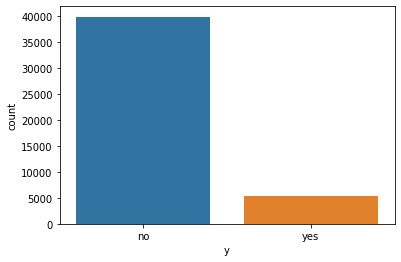

In [10]:
sns.countplot(x='y',data=bank)

Here you can observe that  client has not subscribed for credit deposit for no is more compared to subscription.

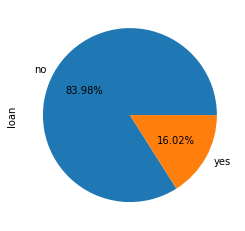

In [11]:
bank['loan'].value_counts().plot.pie(autopct="%2.2f%%")

In most cases in this dataset 84% of peoples don't have any loans and only 16% of people's have loan.

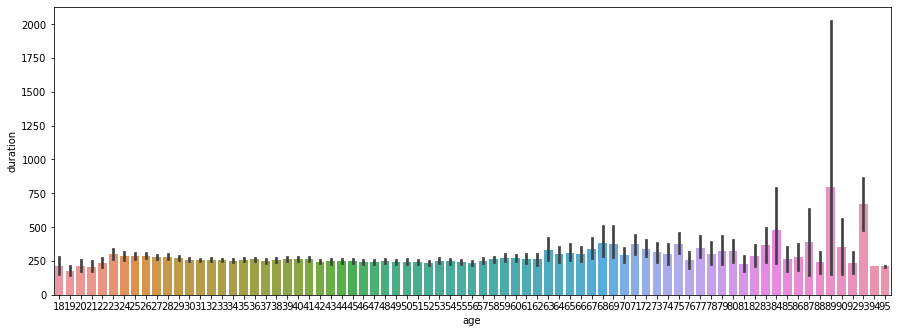

In [12]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.barplot(x="age", y="duration", data=bank)

From here you can observe that whose age is 89 duration is 2000 
  * If duration is more then chances of credit deposit is very less in the sesnse there is more chances to say no.
whose age is in between (18 to 50) dration is very less it's 250 chances of credit deposit is more chances.

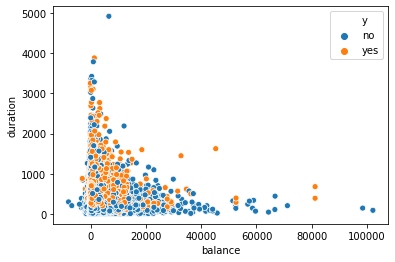

In [13]:
sns.scatterplot(x='balance',y='duration',hue='y',data =bank)

from here we can observe onething  i.e balance is in between 0-20000 and duration is in between 100-2000 then  the credit deposit is going to yes.m

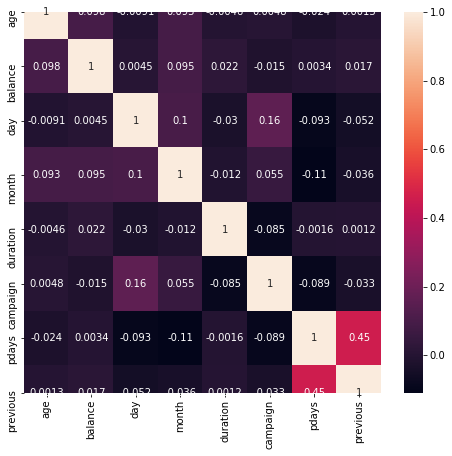

In [14]:
#check cor-relation
corr_hmap=bank.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Month  and day is complete highly negatively cor-relate with pdays.

# Feature Engineering

In [15]:
le=LabelEncoder()
list=['job','marital','education','default','housing','loan','contact','poutcome','y']
for val in list:
    bank[val]=le.fit_transform(bank[val].astype(str))


# Detecting and Removal Of Outliers

age             AxesSubplot(0.125,0.657941;0.0824468x0.222059)
job          AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
marital      AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
education    AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
default      AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
balance      AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
housing      AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
loan         AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
contact         AxesSubplot(0.125,0.391471;0.0824468x0.222059)
day          AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
month        AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
duration     AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
campaign     AxesSubplot(0.520745,0.391471;0.0824468x0.222059)
pdays        AxesSubplot(0.619681,0.391471;0.0824468x0.222059)
previous     AxesSubplot(0.718617,0.391471;0.0824468x0.222059)
poutcome     AxesSubplot(0.817553,0.391471;0.0824468x0.

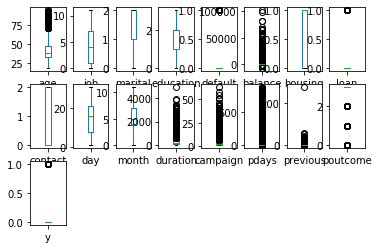

In [16]:
bank.plot(kind='box',subplots=True,layout=(3,8))

From here we can observe dataset contains outliers and it's better to drop those outliers.

In [17]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(bank))
z

array([[1.60696496, 0.10381968, 0.27576178, ..., 0.25194037, 0.44489814,
        0.36398261],
       [0.28852927, 1.42400783, 1.3683719 , ..., 0.25194037, 0.44489814,
        0.36398261],
       [0.74738448, 0.71495069, 0.27576178, ..., 0.25194037, 0.44489814,
        0.36398261],
       ...,
       [2.92540065, 0.20174582, 0.27576178, ..., 1.05047333, 0.56617504,
        2.74738398],
       [1.51279098, 1.02051619, 0.27576178, ..., 0.25194037, 0.44489814,
        0.36398261],
       [0.37068857, 0.71495069, 0.27576178, ..., 4.52357654, 1.57724822,
        0.36398261]])

In [18]:
threshold=3
np.where((z>3))

(array([    7,    34,    37, ..., 45204, 45208, 45210], dtype=int64),
 array([ 4,  5, 11, ..., 14, 11, 14], dtype=int64))

In [19]:
z[7][4]

7.3806246098756345

In [20]:
z[34][5]

3.045498739065863

In [21]:
bank_new=bank[(z<3).all(axis=1)]#removing outliers

In [22]:
bank.shape

(45211, 17)

In [23]:
bank_new.shape

(39456, 17)

5755 rows had been removed as an outliers.

# Check Distribution Of Skewness

In [24]:
x=bank_new.iloc[:,:-1]
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,4,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,4,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,4,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,4,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,4,198,1,-1,0,3


In [25]:
y=bank_new.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

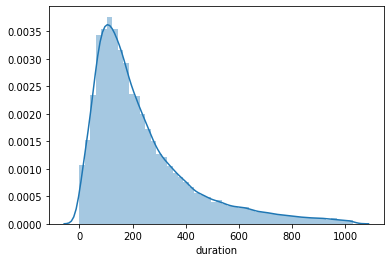

In [26]:
sns.distplot(x['duration'])

In [27]:
collist=x.columns
ncol=16
nrows=14

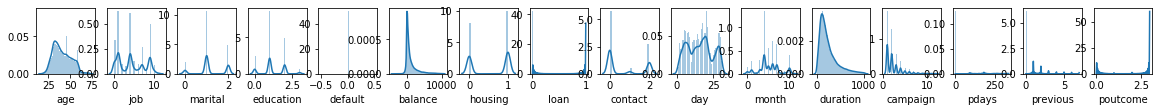

In [28]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(x[collist[i]])

Here you can dataset contains a skeness and it's better to remove this skewness by implmenting techniques.

# Splitting Dataset

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=41)

In [30]:
x_train.shape

(35510, 16)

In [31]:
x_test.shape

(3946, 16)

In [32]:
y_train.shape

(35510,)

In [33]:
y_test.shape

(3946,)

In [34]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [35]:

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Applying MachineLearning Model

In [36]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()


************** DecisionTreeClassifier ***********


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


accuracy score 0.8819057273188039
Cross-val-score= 0.6693341859525501


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3539
           1       0.43      0.44      0.44       407

    accuracy                           0.88      3946
   macro avg       0.68      0.69      0.69      3946
weighted avg       0.88      0.88      0.88      3946



[[3299  240]
 [ 226  181]]


roc_auc_score 0.6884508387757893


AxesSubplot(0.125,0.808774;0.62x0.0712264)


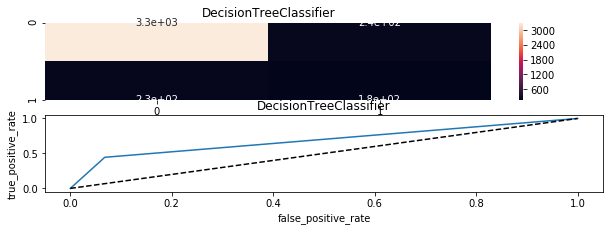

************** RandomForestClassifier ***********


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


accuracy score 0.9067410035478966
Cross-val-score= 0.7786081805181306


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3539
           1       0.61      0.28      0.38       407

    accuracy                           0.91      3946
   macro avg       0.76      0.63      0.66      3946
weighted avg       0.89      0.91      0.89      3946



[[3466   73]
 [ 295  112]]


roc_auc_score 0.6272784896

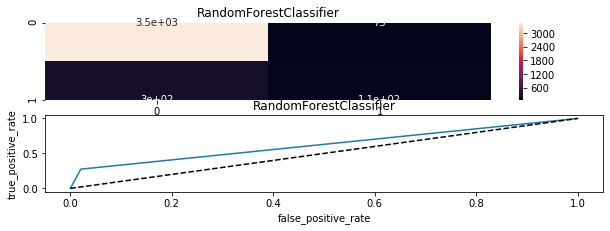

************** KNeighborsClassifier ***********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy score 0.8973644196654841
Cross-val-score= 0.8875684828346984


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3539
           1       0.50      0.28      0.36       407

    accuracy                           0.90      3946
   macro avg       0.71      0.62      0.65      3946
weighted avg       0.88      0.90      0.88      3946



[[3427  112]
 [ 293  114]]


roc_auc_score 0.6242254610437713


AxesSubplot(0.125,0.808774;0.62x0.0712264)


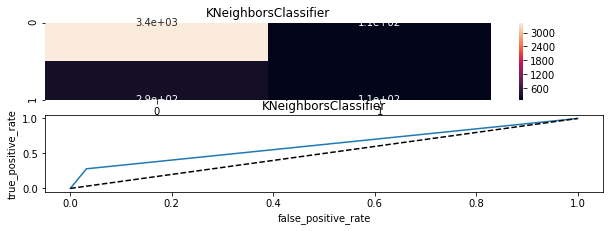

************** SGDClassifier ***********


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


accuracy score 0.9004054738976178
Cross-val-score= 0.8665864551773487


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3539
           1       0.68      0.07      0.12       407

    accuracy                           0.90      3946
   macro avg       0.79      0.53      0.53      3946
weighted avg       0.88      0.90      0.86      3946



[[3526   13]
 [ 380   27]]


roc_auc_score 0.5313328561421243


AxesSubplot(0.125,0.808774;0.62x0.0712264)


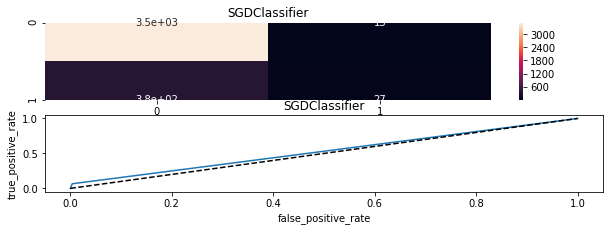

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.9011657374556513
Cross-val-score= 0.8931205529208206


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3539
           1       0.55      0.22      0.32       407

    accuracy                           0.90      3946
   macro avg       0.73      0.60      0.63      3946
weighted avg       0.88      0.90      0.88      3946



[[3465   74]
 [ 316   91]]


roc_auc_score 0.6013386810222074


AxesSubplot(0.125,0.808774;0.62x0.0712264)


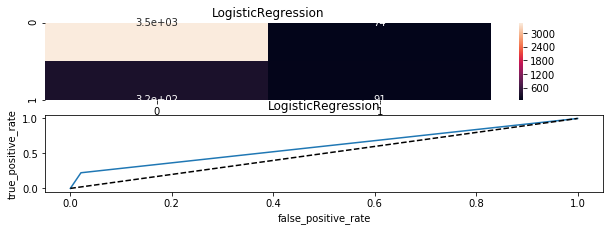

In [37]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))



#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv=model_selection.cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [38]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score,'rocscore':rocscore},columns=['Model','cvs','score','rocscore'])
result

,Model,cvs,score,rocscore
0,DecisionTreeClassifier,66.933419,88.190573,68.845084
1,RandomForestClassifier,77.860818,90.674100,62.727849
2,KNeighborsClassifier,88.756848,89.736442,62.422546
3,SGDClassifier,86.658646,90.040547,53.133286
4,LogisticRegression,89.312055,90.116574,60.133868


# Feature Importance

In [39]:
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
duration,0.261
balance,0.113
day,0.108
age,0.104
month,0.089
poutcome,0.053
job,0.052
pdays,0.047
campaign,0.038


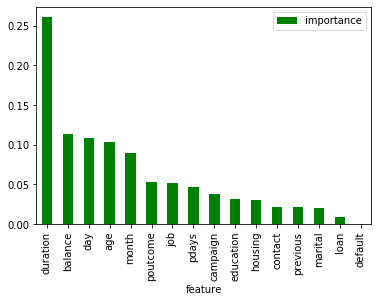

In [40]:
importances.plot.bar(color='green')

From  here we can observe that defult and loan has very least priority.Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But I think it’s just fine to remove only default and loan.

In [41]:
bank.drop(['default','loan'],axis=1,inplace=True)

# Predicting Values 

In [42]:
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('predicted insurance claim:',pred)
print('actual insurance claim',y_test)

predicted insurance claim: [0 0 0 ... 0 0 0]
actual insurance claim 18108    0
5237     0
10272    0
18385    0
34276    0
        ..
24142    0
7485     0
20670    0
3229     0
8266     0
Name: y, Length: 3946, dtype: int32


# Saving Model 

In [43]:
bank=pd.DataFrame(pred)
bank.to_csv('rfc_bank.csv')

In [44]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfc,'bank.obj')
#load the model from a file
dct_from_joblib=joblib.load('bank.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])